<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/NN_Large_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
insurance = pd.read_csv('insurance.csv')
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#One hot encodingi pandanın bize sağladığı get dummies fonksiyonuyla yapıcaz. hepsini otomatik kendisi one hot encode yapıyor goat.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() #.head ilk 5 rowu göstermek için


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#We will split our dataframe into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Bu Python kodu, TensorFlow kütüphanesini kullanarak bir yapay sinir ağı modelini oluşturmayı ve eğitmeyi amaçlamaktadır. Ağırlıkların rastgele başlangıç ​​değerlerine bağlı olduğu bir sinir ağı oluşturulur ve model, veri kümesine uyacak şekilde eğitilir.

Aşamaları ayrıntılı olarak açıklayalım:

İlk satır tf.random.set_seed(42) ile rastgele sayı üreteçlerinin tekrarlanabilirliğini sağlar. Bu, modelin her seferinde aynı rastgele başlangıç ​​değerlerine sahip olmasını sağlayarak tekrar edilebilir sonuçlar elde etmemize yardımcı olur.

tf.keras.Sequential ile bir model oluşturuluyor. Bu, katmanları sıralı bir şekilde eklemeyi sağlayan temel bir Keras modeli türüdür.

Modelde iki katman bulunmaktadır:

İlk katman: tf.keras.layers.Dense(10). Bu, 10 nöron içeren bir yoğun katmandır. Yoğun katman, tüm girdi öğelerinin her bir çıkış nöronuyla bağlandığı tam bağlı bir katmandır.

İkinci katman: tf.keras.layers.Dense(1). Bu, tek bir çıkış nöronu içeren ikinci bir yoğun katmandır. Bu katman, bir regresyon problemi çözmek için kullanılmaktadır, çünkü yalnızca bir nümerik değer tahmin etmek istiyoruz.

model.compile yöntemi, modelin eğitim süreci için kayıp fonksiyonu, optimizer (eniyileme algoritması) ve metrikleri belirlemek için kullanılır.

loss = tf.keras.losses.mae: Ortalama Mutlak Hata (MAE) kaybı, modelin tahminleri ile gerçek etiketler arasındaki farkın mutlak değerlerinin ortalamasıdır. Bu, regresyon problemleri için yaygın olarak kullanılan bir kayıp fonksiyonudur.

optimizer = tf.keras.optimizers.SGD(): Modelin eniyileme algoritması olarak Stokastik Gradyan İnişi (SGD) kullanılır. Bu, modelin kayıp fonksiyonunu minimize etmek için ağırlıkları güncelleyen bir gradyan tabanlı optimizasyon algoritmasıdır.

metrics = ["mae"]: Eğitim süreci sırasında modelin performansını değerlendirmek için kullanılacak metrikleri belirtir. Burada, modelin Ortalama Mutlak Hata'yı (MAE) takip etmesini istiyoruz.

model.fit yöntemi, modeli verilerle eğitmek için kullanılır.

tf.expand_dims(X_train, axis=-1): Eğitim verileri olan X_train verileri, sona eklenen ekstra boyut sayesinde (genellikle bu boyut batch boyutunu temsil eder), modelin beklentisi olan 2D tensörden 3D tensöre dönüştürülür. Modelin girdi boyutu 2D olmadan (örneğin, (batch_size, input_dim) yerine (batch_size, input_dim, 1)) doğru şekilde işlenir.

y_train: Modelin eğitilmesi için etiketler.

epochs = 100: Modelin tüm eğitim verilerini 100 kez göreceği eğitim döngüsü sayısıdır. Yani model 100 kez eğitim verileri üzerinden geçer ve ağırlıklarını günceller.

Bu şekilde, model verilere göre eğitilir ve belirtilen kayıp fonksiyonu (MAE) ve metrikler (MAE) kullanılarak eğitim süreci boyunca modelin performansı izlenir. Eğitim tamamlandığında, model, verileri temsil etmek ve yeni veriler üzerinde tahminler yapmak için kullanılabilir hale gelir.








In [ ]:
#We will create our model

tf.random.set_seed(42)

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10) ,
     tf.keras.layers.Dense(1)
     ]

)

#compile a model
model.compile(loss = tf.keras.losses.mae  ,
              optimizer = tf.keras.optimizers.SGD() ,
              metrics = ["mae"]
              )

#Fit a model

model.fit( X_train , y_train , epochs = 100 )

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8670.2500 - mae: 8670.2500
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7872.6870 - mae: 7872.6870
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.4526 - mae: 7565.4526
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.5073 - mae: 7496.5073
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7643.2700 - mae: 7643.2700
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7567.2749 - mae: 7567.2749
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.8208 - mae: 7551.8208
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.4619 - mae: 7748.4619
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7502.8501 - mae: 7502.8501
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7673.9233 - mae: 7673.9233

In [ ]:
# Check the results of the insurance model on the test data
model.evaluate(X_test , y_test)



9/9 [==============================] - 0s 2ms/step - loss: 8617.6396 - mae: 8617.6396


[8617.6396484375, 8617.6396484375]

# Right now our model isnt performing too well... lets try and improve it

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

insurance_model_2.fit( X_train, y_train , epochs = 100 )



Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13292.2715 - mae: 13292.2715
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13136.6992 - mae: 13136.6992
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12795.9658 - mae: 12795.9658
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12122.8350 - mae: 12122.8350
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10999.7461 - mae: 10999.7461
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9564.5732 - mae: 9564.5732
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8235.7129 - mae: 8235.7129
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7564.3052 - mae: 7564.3052
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7443.9834 - mae: 7443.9834
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7423.2217 - mae:

In [ ]:
#Another improve
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

history = insurance_model_3.fit( X_train, y_train , epochs = 200 )

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13272.3184 - mae: 13272.3184
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13078.6797 - mae: 13078.6797
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12690.4326 - mae: 12690.4326
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11955.2129 - mae: 11955.2129
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10769.1270 - mae: 10769.1270
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9321.1582 - mae: 9321.1582
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8054.7319 - mae: 8054.7319
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7511.1494 - mae: 7511.1494
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7428.1377 - mae: 7428.1377
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7408.3906 - mae:

In [ ]:
insurance_model_3.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3485.7563 - mae: 3485.7563


[3485.75634765625, 3485.75634765625]

Text(0.5, 0, 'epochs')

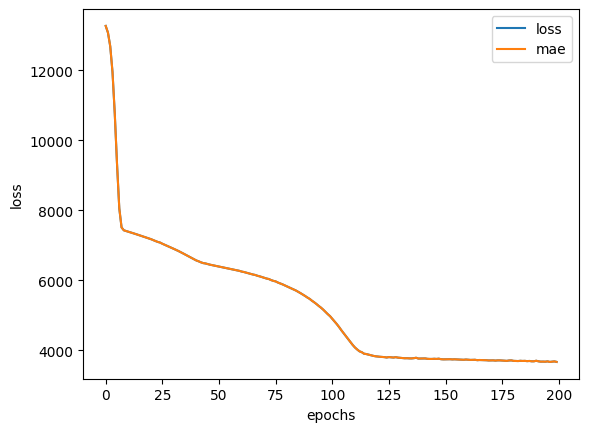

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")   #bu aslında ilk aldığım kursta optimal number of epochs bakıyoduk onun aynısı. Yani 115. epochs gibi durmamız gerekiyor.

# Preprocessing data (normalization and standartization)
* Feature scaling : Neural networks tend to prefer normalization

<Axes: ylabel='Frequency'>

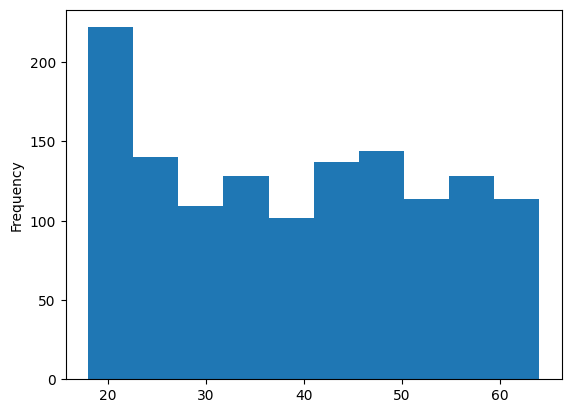

In [ ]:
X["age"].plot(kind = "hist")  #gördüğümüz gibi yaş çok farklı scale lerde

<Axes: ylabel='Frequency'>

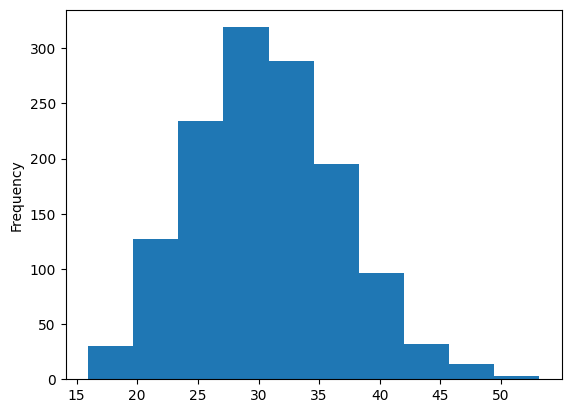

In [ ]:
X["bmi"].plot(kind = "hist")

# If you are not sure on which to use , you could try both and see which one performs better.